In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 15
pd.options.display.max_rows = None

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [4]:
print("Dataset shape", train.shape)

Dataset shape (404290, 6)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Target Class Distribution


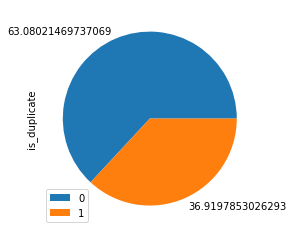

In [6]:
print('Target Class Distribution')
class_distribution = train['is_duplicate'].value_counts(normalize=True).mul(100)
class_distribution.plot.pie(labels=class_distribution)
plt.legend(class_distribution.index)

In [7]:
nan_rows = train[train.isnull().any(1)]
print (nan_rows)
train.dropna(inplace=True)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364  How can I develop android app?     
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341  NaN                                

                                                                                                                          question2  \
105780  NaN                                                                                                                           
201841  NaN                                                                                                                           
363362  My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronounciation of my Chinese name?   

        is_duplicate  
105780  0             
201841  0             
363362  0             


In [8]:
qids = pd.Series(train['qid1'].tolist() + train['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print (f'Total number of  Unique Questions are: {unique_qs}')

print (f'Number of unique questions that appear more than one time: {qs_morethan_onetime} ({qs_morethan_onetime/unique_qs*100:.2f}%)')

print (f'Max number of times a single question is repeated: {max(qids.value_counts())}') 

Total number of  Unique Questions are: 537929
Number of unique questions that appear more than one time: 111778 (20.78%)
Max number of times a single question is repeated: 157


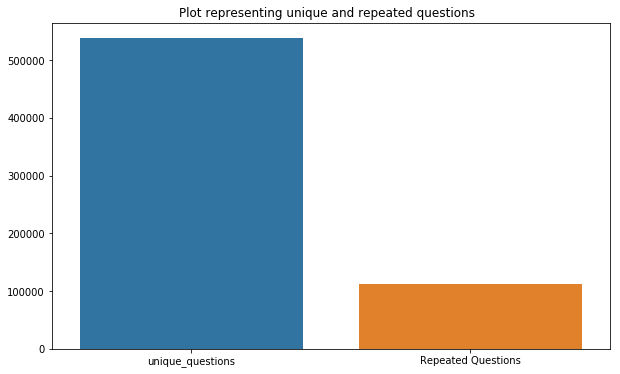

In [9]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

Maximum number of times a single question is repeated: 157



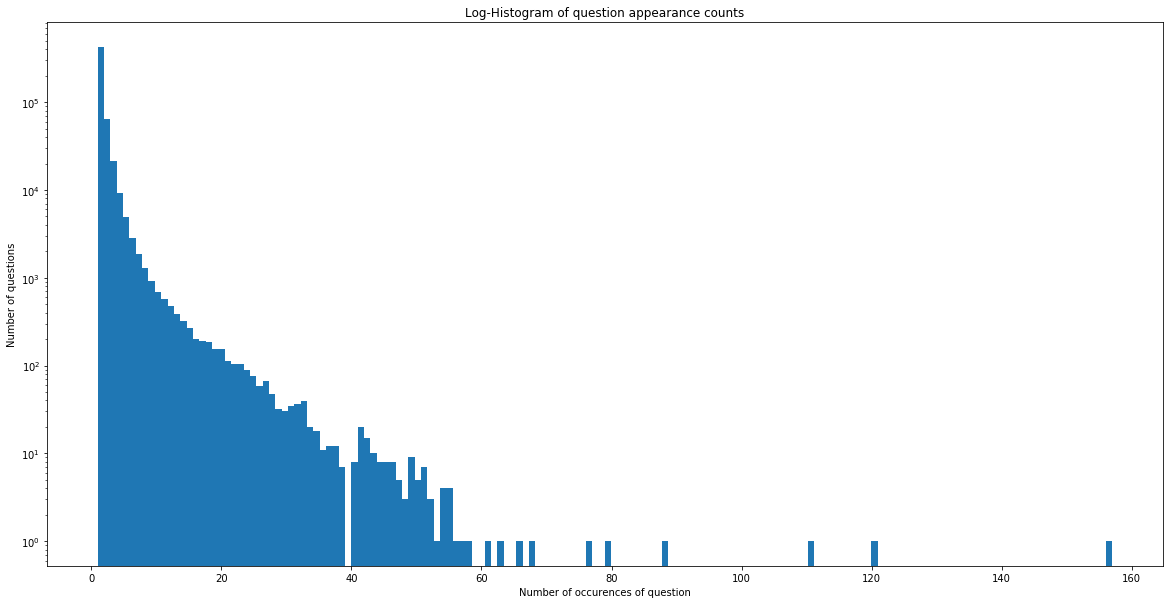

In [10]:
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [11]:
print('Top 10 most frequently asked questions')

for i in range(1, 11):
    x = qids.value_counts().head(i).tail(1)
    try:
        print(x.values[0], 
              train[train['qid1'] == x.index[0]]['question1'].head(1).values[0])
    except:
        print(x.values[0],
              train[train['qid2'] == x.index[0]]['question2'].head(1).values[0])

Top 10 most frequently asked questions
157 What are the best ways to lose weight?
120 How can you look at someone's private Instagram account without following them?
111 How can I lose weight quickly?
88 What's the easiest way to make money online?
79 Can you see who views your Instagram?
77 What are some things new employees should know going into their first day at AT&T?
68 What do you think of the decision by the Indian Government to demonetize 500 and 1000 rupee notes?
66 Which is the best digital marketing course?
63 How can you increase your height?
61 How do l see who viewed my videos on Instagram?


In [12]:
train_qs = pd.DataFrame(train['question1'].tolist() + train['question2'].tolist(), columns=['question']).astype(str)

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


mean-train 59.82 (31.96)
max-train 1169.00


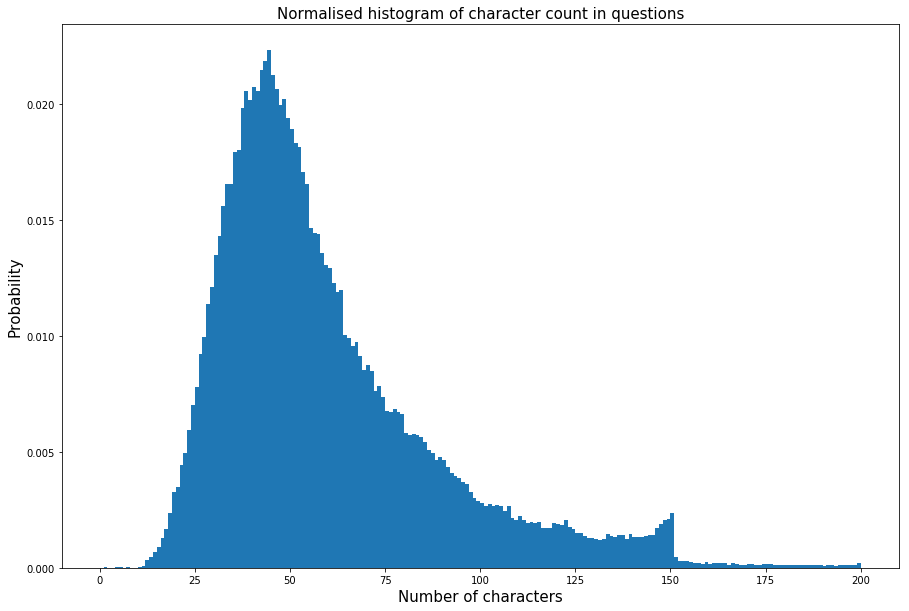

In [13]:
train_qs['chars'] = train_qs['question'].progress_apply(len)

plt.figure(figsize=(15, 10))
plt.hist(train_qs['chars'], bins=200, range=[0, 200], normed=True)
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print(f"mean-train {train_qs['chars'].mean():.2f} ({train_qs['chars'].std():.2f})\nmax-train {train_qs['chars'].max():.2f}")


mean-train 11.06 (5.88)
max-train 237.00


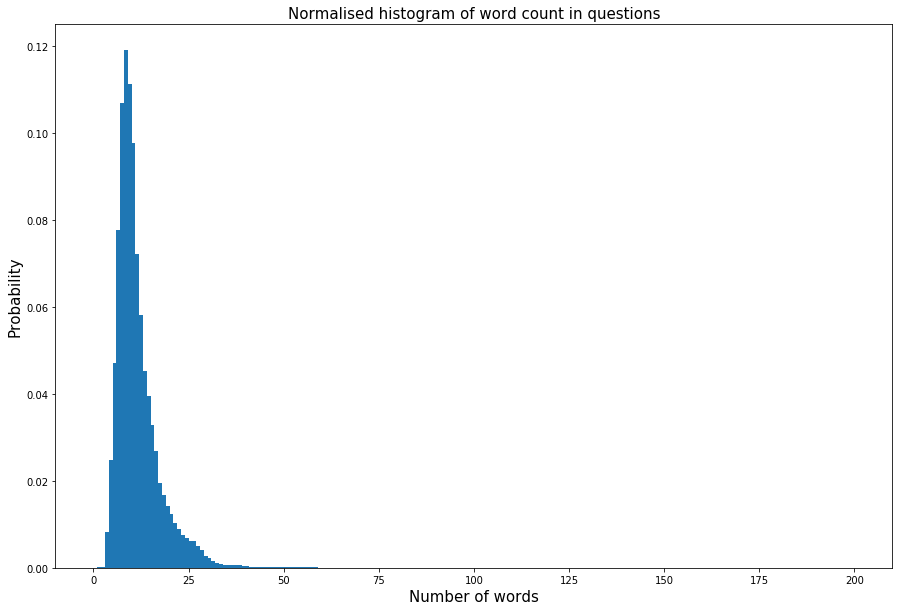

In [14]:
train_qs['words'] = train_qs['question'].progress_apply(lambda x: len(x.split()))

plt.figure(figsize=(15, 10))
plt.hist(train_qs['words'], bins=200, range=[0, 200], normed=True)
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print(f"mean-train {train_qs['words'].mean():.2f} ({train_qs['words'].std():.2f})\nmax-train {train_qs['words'].max():.2f}")

In [15]:
train_qs = train_qs.sort_values('words')

**Longest and Shortest Questions**

In [16]:
print(set(train_qs[train_qs['words'] == 1]['question'].values))

{'Hh', 'I', 'no', 'My', '.', '?', 'parisflatlist', 'spam', 'H', 'Delete', 'What?', 'Deleted.', 'i', 'Ok', 'sss', 'delete', 'Na', 'null ', 'Null ', 'How', 'Life:', '111', 'Aaas', 'HH', 'Is?', 'lol', 'Hh ', 'Marriage', '[removed]', 'Can?', "I'm ", 'Why', 'Q?', 'o', '…………..', 'civil', 'deleted', 'Why?', 'Spam', 'Does?', 'grammar', 'hi', '…..', '????', 'Nana', 'Edit', '‘', 'Cloning?', 'What', 'Error', 'A', 'Which'}


In [17]:
train_qs.drop_duplicates().tail()

,question,chars,words
628001,"This question is stirred up by the recent Romney drama overseas. Firstly, other than the obvious Palestinian and British opinions, how does the world see our presidential elections of this year differently than we do in the states? We blame President Obama for our problems and many see Romney as a way out. Is this a fog, do international perspectives recognize the problem as bigger than a ""leader"" so to speak? Rather than seeing the leader as a solution, do they see things more intelligently? And also, is it common practice around the world to blame the elected official for problems? For example, the EU is having a hard time at the moment - I haven't heard Any reports about citizens pointing fingers at their leaders.",726,126
808353,"Whole fight card for UFC on Fuel TV 9, 6th April in Stockholm, Sweden? I've been looking around for the card for this upcoming event, but I can't find more than three fights. More isn't listed at UFC's site so I presume that the card isn't finished yet? But are there any rumors or any other things that indicate which fighters may participate? I had the best seats in the house money can buy last year and planning to buy the same again tomorrow when the pre sale starts (in exactly 13h from now). But I don't want to pay $375 USD if the only good fight is the main event (Alexander Gustafsson FTW!)... All information/rumours/indications is appreciated ASAP so I can decide how much money I'm willing to pay for the tickets?",727,133
595124,"Regarding Google Plus Profile Privacy Settings: Here's the scenario: An individual finds my Google Plus page. They go to my profile. They take a screen shot of it. The screen shot includes a portion which reads, ""Other Names"" below which is a name, below which are the words, ""Visible Only To You"" below which are ""Google Contact Details"" below which appear again, Visible Only To You."" The screen shot was then printed and presented to a third party as evidence of my so-called ""other name."" I logged in and saw the name, this time with the privacy settings set to Public but this profile defaults to ""only you"" so it had been changed. These changes to my profile were not made by me. Does the screenshot that was taken then printed mean the party taking it was actually logged in as me. Or is there another explanation?",823,147
557728,"I have been married almost 15 years. We have two children, 11 and 8. My childhood was horrible, seven years of sexual, physical, and mental/emotional abuse followed by instability and low self esteem issues as a teen. My husband met me after I began dealing with my childhood and knew all about my issues. He knew what would end our marriage, yet he did it and lied about it multiple times. I was pregnant and did not leave. We tried to make it work. We had another child. We have been through MANY ""situations"" in our marriage and as parents. For the past 6-8 years we have just been living as parents. Not lovers. In the past I tried everything to make our marriage work. I finally decided to be done with it. Now he says he loves me and wants to make it work. But he is manipulative and can be so mean. He uses my children to cause me pain and stress. He knows that they are the only reason I stay. We are in counciling, but I really have no ""love"" feelings for him. I told him I want a divorce, but he won't give me one. He has said he will make my life miserable until the 18 months of separation are up and divorce is granted. Any advice? I'm ready to run away...",1169,228
781929,"Heartbreak? Heartbreak? She's my girlfriend for two months, I chose her over my girlfriend for 2 years. I like her so much to the point that I can't let her go even if she wants to end our relationship because of the other people around us most especially her family. I do the things for her that I'm not used to for a girl and I am willing to sacrifice everything just to have a little time with her. A little and limited time that I'm a

In [18]:
print("Questions with question marks:", 
      round(np.mean(train_qs['question'].progress_apply(lambda x: '?' in x))*100, 2),
      "%")
print("Questions with [math] tags:", 
      round(np.mean(train_qs['question'].progress_apply(lambda x: '[math]' in x))*100, 2),
      "%")
print("Questions with full stops:", 
      round(np.mean(train_qs['question'].progress_apply(lambda x: '.' in x))*100, 2),
      "%")
print("Questions with capitalised first letters:", 
      round(np.mean(train_qs['question'].progress_apply(lambda x: x[0].isupper()))*100, 2),
      "%")
print("Questions with capital letters:",
      round(np.mean(train_qs['question'].progress_apply(lambda x: max([y.isupper() for y in x])))*100,2),
      "%")
print("Questions with numbers:", 
      round(np.mean(train_qs['question'].progress_apply(lambda x: max([y.isdigit() for y in x])))*100, 2),
      "%")


Questions with question marks: 99.87 %



Questions with [math] tags: 0.12 %



Questions with full stops: 6.31 %



Questions with capitalised first letters: 99.81 %



Questions with capital letters: 99.95 %



Questions with numbers: 11.83 %


In [19]:
del train_qs

In [20]:
train['lenq1'] = train['question1'].progress_apply(lambda x: len(x.split()))
train['lenq2'] = train['question2'].progress_apply(lambda x: len(x.split()))

In [21]:
train[(train['lenq1'] == 1) | (train['lenq2'] == 1)]

,id,qid1,qid2,question1,question2,is_duplicate,lenq1,lenq2
3306,3306,6553,6554,.,Why is Cornell's endowment the lowest in the Ivy League?,0,1,10
13016,13016,25026,25027,?,Why should one not work at Google?,0,1,7
17682,17682,33561,33562,deleted,Which website will be suitable for downloading eBooks and lectures?,0,1,10
20072,20072,37898,37899,How could I solve this?,…………..,0,5,1
20794,20794,39204,39205,?,What is the Gmail tech support help phone number?,0,1,9
23305,23305,33561,43661,deleted,Which are some best websites for downloading newly published books/eBooks?,0,1,10
23884,23884,44699,44700,HH,What is hh?,0,1,3
25228,25228,47035,47036,What?,What should Indians do if Donald Trump becomes President?,0,1,9
25315,25315,47198,29712,deleted,What kind of questions on Quora aren't OK? What is Quora's policy on question deletion?,0,1,15
39769,39769,33561,72063,deleted,What is a website where I can download eBooks legally?,0,1,10


*All these question pairs seem to be outliers*

In [22]:
train[(train['lenq1'] > 1) & (train['lenq2'] > 1)][['id', 'qid1', 'qid2',
                                                      'question1', 'question2', 'is_duplicate']].to_csv('train_reduced.csv')

In [23]:
test = pd.read_csv('test.csv')

In [24]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,2,What but is the best way to send money from China to the US?,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [25]:
print("Dataset shape", train.shape)

Dataset shape (404287, 8)


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB


In [27]:
qids = pd.Series(test['question1'].tolist() + test['question2'].tolist())
unique_qs = len(qids.drop_duplicates())
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print (f'Total number of  Unique Questions are: {unique_qs}')

print (f'Number of unique questions that appear more than one time: {qs_morethan_onetime} ({qs_morethan_onetime/unique_qs*100:.2f}%)')

print (f'Max number of times a single question is repeated: {max(qids.value_counts())}') 

Total number of  Unique Questions are: 4363832
Number of unique questions that appear more than one time: 155662 (3.57%)
Max number of times a single question is repeated: 2686


Maximum number of times a single question is repeated: 2686



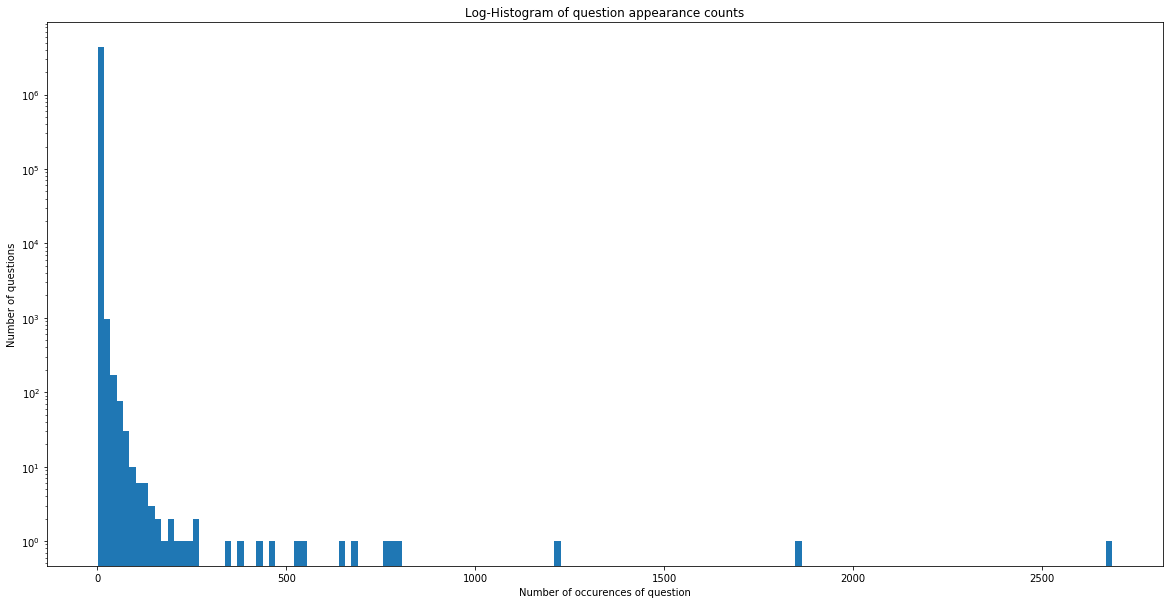

In [28]:
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [29]:
print('Top 20 most frequently asked questions')
qids.value_counts().head(20)

Top 20 most frequently asked questions


What                             2686
How                              1848
What is                          1212
What are                         803 
How do                           773 
What is the                      766 
What is?                         680 
Why                              653 
Is                               543 
How do I                         531 
How can                          456 
What are the                     422 
Which                            371 
How can I                        346 
How can I improve my English?    266 
What are some                    265 
Can                              242 
I                                220 
Why do                           210 
How do I improve my English?     197 
dtype: int64

# Baseline Model

As we have seen that we have a 36.91% positive class in this dataset. Since we are using the LogLoss metric, and LogLoss looks at the actual predicts as opposed to the order of predictions, we should be able to get a decent score by creating a submission predicting the mean value of the label.

In [30]:
from sklearn.metrics import log_loss

In [31]:
p = train['is_duplicate'].mean()
print('Predicted score:', log_loss(train['is_duplicate'], np.zeros_like(train['is_duplicate']) + p))

sub = pd.DataFrame({'test_id': test['test_id'], 'is_duplicate': p})
sub.to_csv('Baseline.csv')

del p

Predicted score: 0.658528851473067


**0.55 on the leaderboard! Score!**